page87の制御Gc(z)の特性を調べるため、Bode線図を描いてみた。20240214　shimojo

In [2]:
#z伝達関数の周波数応答を調べたいために作成
# shimojo　20240214
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
#
#まずlhighpass filter のBODE線図を求める
#伝達関数　H(z)=Kgain*(z+b)/(z+a)　の形
# z=exp(jwT)とし、計算を行う
#T=dt sampling interval
#(z^(-1))の形にした
# H(z)=Kgain*(1+b*exp(-jwT))/(1+a*exp(-jwT))

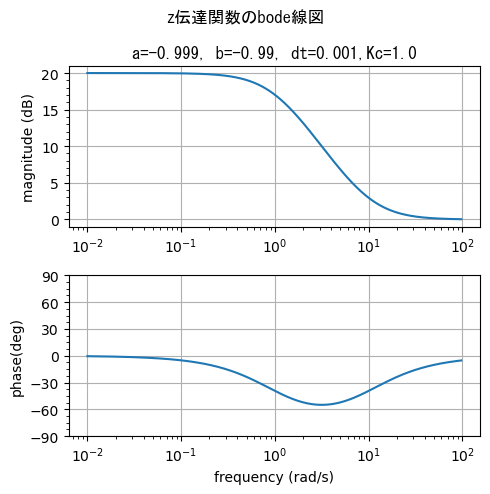

In [32]:
#  exp(-jwT))の準備
c=1j #複素数にするため
#w=2πf --> j*freqへ変換
freq=(2*np.pi)*c #複素数
freq=(1/(2*np.pi))*c #複素数
freq=c #複素数
# H(z)=(1+b*exp(-jwT))/(1+a*exp(-jwT))
#T=dt sampling interval

#Plotの準備
# 10**tw[i]を作成する
tw=np.arange(-2, 2,0.01)# 10(^-2)~10(^2),0.01間隔
knum=len(tw) #twの数列が何個あるか
wt=np.zeros(knum) #wt[i]=10**tw[i]
# 計算データ
y=np.zeros(knum) #magunitude
angl=np.zeros(knum) #phase

################################################
# z伝達関数の計算
# H(z)=Kgain*(1+b*exp(-jwT))/(1+a*exp(-jwT))
# dt＝0.1だと誤差が大きい？→nyquist=5Hz
# dt＝0.001→nyquist=500Hz
################################################
#lowpass filter
Kgain=1.0
a=-0.9048;b=-0.04837 #lowpass dt=0.1
dt=0.1 
Kgain=1.0
a=-0.99;b=-0.9005 #lowpass dt=0.01
dt=0.01 
Kgain=1.0
a=-0.999;b=-0.99 #lowpass dt=0.1
dt=0.001 
################################################
#high-pass filter
#Kgain=10.0
#a=-0.99;b=-9.99/Kgain #lowpass dt=0.1
#dt=0.001 #大きいとcutoff周波数が低いものしか不可
################################################
#page87a　のH(z)=Kgain*(z+b)/(z+a)
###Case(a)
###a=0.72152,b=-0.57042,K=1.18,Kc=245
#Kgain=245.0
#a=0.72152;b=-0.57042   #(a)
#dt=0.1
################################################
###Case(b)
###a=0.0099619,b=-0.67817,K=0.395,Kc=81.6
#Kgain=81.6
#a=0.0099619;b=-0.67817 #(b)
#dt=0.1



for i in range(0,knum):
    if tw[i]>0:wt[i]=10**tw[i]
    else: wt[i]=(1/10)**(-tw[i])    
    #
    Hw=Kgain*(1+b*np.exp(-freq*wt[i]*dt))/(1+a*np.exp(-freq*wt[i]*dt))
    #
    y[i]=20.0*np.log10(abs(Hw)) #dB変換のため20倍とする
    angl[i]=np.angle((Hw))*(180/np.pi) #degree変換

# end i-loop
#########################################################
# PLOT
#########################################################
fig = plt.figure(figsize=(5, 5),tight_layout=True) # Figureの初期化(横ｘ縦)
Title_para="a="+str(a)+", b="+str(b)+", dt="+str(dt)+",Kc="+str(Kgain)
plt.suptitle("z伝達関数のbode線図", fontname="MS Gothic")
#########################################################
#                 subplot 1                             #
#########################################################
#plt.subplot(211) 
ax1=plt.subplot(211)
plt.plot(wt,y)
plt.title(""+Title_para, fontname="MS Gothic")
plt.xscale('log')
plt.ylabel("magnitude (dB)")
plt.minorticks_on()
plt.grid()
#########################################################
#                 subplot 2                             #
#########################################################
#plt.subplot(212) 
ax2=plt.subplot(212) 
plt.plot(wt,angl)
plt.ylabel("phase(deg)")
plt.xlabel("frequency (rad/s)")
plt.xscale('log')
Ymax=90; Ymin=-90
plt.ylim(Ymin,Ymax)
ax2.set_yticks(np.linspace(Ymin, Ymax,7))
plt.minorticks_on()
plt.grid()
  